Import libraries

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report
import seaborn as sns
from google.colab import drive
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


Import Dataset

In [4]:
url = '/content/drive/MyDrive/mllabpg/lab12/bank-full.csv'
data = pd.read_csv(url, delimiter=";")
data.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


Descriptive statistics

In [ ]:
data.describe()


,age,balance,day,duration,campaign,pdays,previous
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,1362.272058,15.806419,258.163080,2.763841,40.197828,0.580323
std,10.618762,3044.765829,8.322476,257.527812,3.098021,100.128746,2.303441
min,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000
50%,39.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,48.000000,1428.000000,21.000000,319.000000,3.000000,-1.000000,0.000000
max,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


Data Cleaning


In [ ]:
data.isnull().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

Data Visulaization

In [5]:
import matplotlib.pyplot as plt


In [ ]:
fig, ax = plt.subplots(figsize=(15, 6))
numeric_column = "duration"
sns.histplot(data[numeric_column], kde=True)
plt.title("Histogram of " + numeric_column)
plt.xlabel(numeric_column)
plt.ylabel("Frequency")
plt.show()

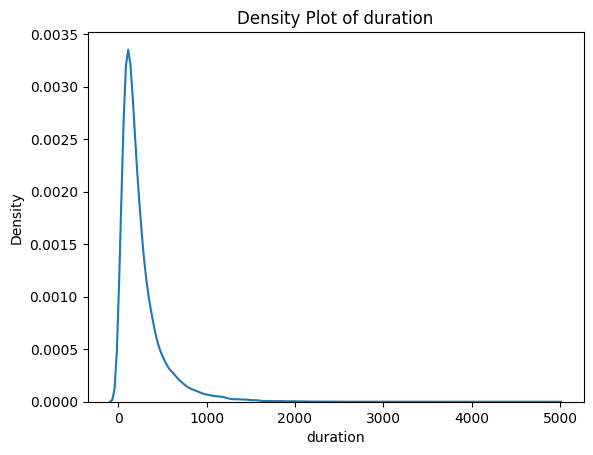

In [ ]:
sns.kdeplot(data[numeric_column])
plt.title("Density Plot of " + numeric_column)
plt.xlabel(numeric_column)
plt.ylabel("Density")
plt.show()

Feature Selection

In [6]:
X = data[["age","job","marital","education","default","balance","housing","loan","contact","day","month","duration","campaign","pdays","previous","poutcome"]]
y = data["y"]

Evaluate Algorithms

Split-out Validation Dataset


In [7]:
X_encoded = pd.get_dummies(X)#one hot encoding to convert cat to bi vector since svm cannot handle cat
X_train, X_val, y_train, y_val = train_test_split(X_encoded, y, test_size=0.2, random_state=42)


Train and Test

In [8]:
svm = SVC()
svm.fit(X_train, y_train)

y_pred = svm.predict(X_val)

accuracy = accuracy_score(y_val, y_pred)
print("Accuracy:", accuracy)

print(classification_report(y_val, y_pred))


Accuracy: 0.8794647793873714
              precision    recall  f1-score   support

          no       0.88      1.00      0.94      7952
         yes       0.54      0.01      0.01      1091

    accuracy                           0.88      9043
   macro avg       0.71      0.50      0.47      9043
weighted avg       0.84      0.88      0.82      9043



In [9]:
from sklearn.decomposition import PCA

In [10]:
pca = PCA()
X_train_pca = pca.fit_transform(X_train)
X_val_pca = pca.transform(X_val)


In [11]:
svm_with_pca = SVC()
svm_with_pca.fit(X_train_pca, y_train)

y_pred_with_pca = svm_with_pca.predict(X_val_pca)

accuracy_with_pca = accuracy_score(y_val, y_pred_with_pca)
print("Accuracy (with PCA):", accuracy_with_pca)

print("Classification Report (with PCA):")
print(classification_report(y_val, y_pred_with_pca))


Accuracy (with PCA): 0.8794647793873714
Classification Report (with PCA):
              precision    recall  f1-score   support

          no       0.88      1.00      0.94      7952
         yes       0.53      0.01      0.02      1091

    accuracy                           0.88      9043
   macro avg       0.70      0.50      0.48      9043
weighted avg       0.84      0.88      0.82      9043



In [13]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_encoded)


In [17]:
pca = PCA(n_components=0.95)  
X_pca = pca.fit_transform(X_scaled)


In [18]:
X_train, X_val, y_train, y_val = train_test_split(X_pca, y, test_size=0.2, random_state=42)


In [19]:
svm = SVC()
svm.fit(X_train, y_train)
y_pred = svm.predict(X_val)
accuracy = accuracy_score(y_val, y_pred)
print("Accuracy:", accuracy)
print(classification_report(y_val, y_pred))


Accuracy: 0.9037929890523057
              precision    recall  f1-score   support

          no       0.92      0.98      0.95      7952
         yes       0.70      0.35      0.47      1091

    accuracy                           0.90      9043
   macro avg       0.81      0.66      0.71      9043
weighted avg       0.89      0.90      0.89      9043

